In [75]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Data generation

In [76]:
color = ["white","black"]
size = ['big', 'small']
weight = ['heavy', 'light']

data=pd.DataFrame({"color":[color[x] for x in np.random.randint(0,len(color),500)],
                  "size":[size[x] for x in np.random.randint(0,len(size),500)],
                  "weight":[weight[x] for x in np.random.randint(0,len(weight),500)]
                  })

In [77]:
data.head()

,color,size,weight
0,black,small,heavy
1,white,big,light
2,black,small,light
3,black,big,light
4,white,small,heavy


# One feature

In [78]:
data_1d = data.iloc[:, 0]

In [79]:
data_1d.head()

0    black
1    white
2    black
3    black
4    white
Name: color, dtype: object

## One-hot encoding

In [80]:
data_1d = pd.concat([data_1d, pd.get_dummies(data_1d)], axis=1)


In [81]:
data_1d.head()

,color,black,white
0,black,1,0
1,white,0,1
2,black,1,0
3,black,1,0
4,white,0,1


In [82]:
reducer = umap.UMAP()

In [83]:
embedding = reducer.fit_transform(data_1d.iloc[:, 1:])
embedding.shape

(500, 2)

In [84]:
data_1d['umap_X'] = embedding[:, 0]
data_1d['umap_Y'] = embedding[:, 1]

<AxesSubplot:xlabel='umap_X', ylabel='umap_Y'>

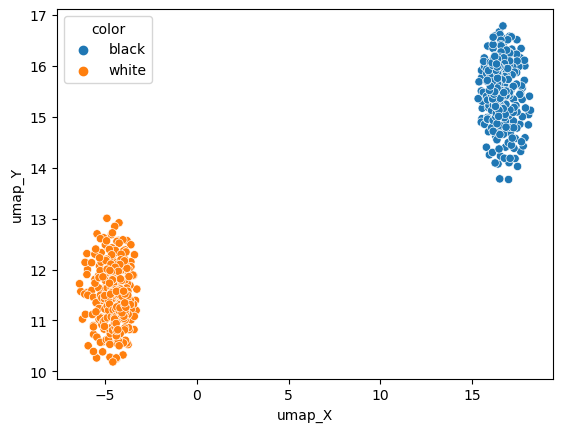

In [85]:
sns.scatterplot(
    data=data_1d,
    x='umap_X',
    y='umap_Y', 
    hue='color')

## Label encoding

In [86]:
labelencoder = LabelEncoder()

In [87]:
data_1d['color'] = labelencoder.fit_transform(data_1d['color'])

In [88]:
data_1d.head()

,color,black,white,umap_X,umap_Y
0,0,1,0,16.501265,13.777998
1,1,0,1,-3.274255,11.615689
2,0,1,0,17.391325,16.235727
3,0,1,0,16.475220,16.661209
4,1,0,1,-6.235471,11.027761


In [89]:
embedding = reducer.fit_transform(data_1d.iloc[:,0].array.reshape(-1,1))
embedding.shape

(500, 2)

In [90]:
data_1d['umap_X'] = embedding[:, 0]
data_1d['umap_Y'] = embedding[:, 1]

<AxesSubplot:xlabel='umap_X', ylabel='umap_Y'>

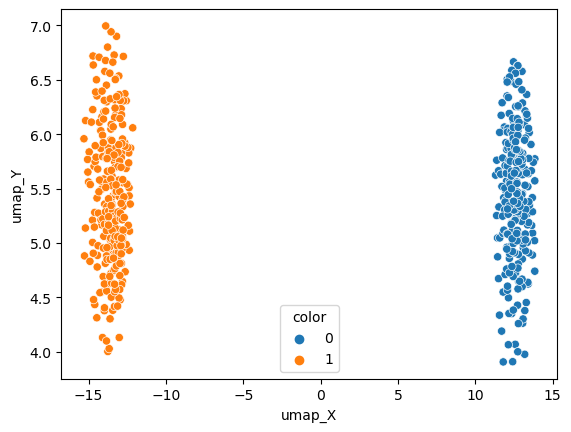

In [91]:
sns.scatterplot(
    data=data_1d,
    x='umap_X',
    y='umap_Y', 
    hue='color')

# Two features

In [92]:
data_2d = data.iloc[:, 0:2]

In [93]:
data_2d.head()

,color,size
0,black,small
1,white,big
2,black,small
3,black,big
4,white,small


## One-hot encoding

In [94]:
data_2d = pd.concat([data_2d, pd.get_dummies(data_2d)], axis=1)

In [95]:
data_2d.head()

,color,size,color_black,color_white,size_big,size_small
0,black,small,1,0,0,1
1,white,big,0,1,1,0
2,black,small,1,0,0,1
3,black,big,1,0,1,0
4,white,small,0,1,0,1


In [96]:
embedding = reducer.fit_transform(data_2d.iloc[:, 2:])
embedding.shape

(500, 2)

In [97]:
data_2d['umap_X'] = embedding[:, 0]
data_2d['umap_Y'] = embedding[:, 1]

<AxesSubplot:xlabel='umap_X', ylabel='umap_Y'>

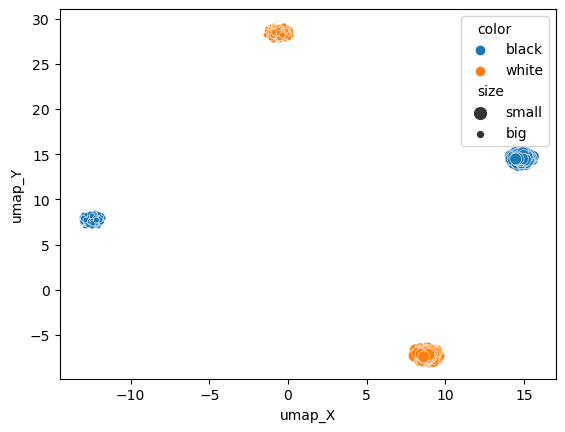

In [98]:
sns.scatterplot(
    data=data_2d,
    x='umap_X',
    y='umap_Y', 
    hue='color',
    size='size')

## Label encoding

In [99]:
data_2d['color'] = labelencoder.fit_transform(data_2d['color'])
data_2d['size'] = labelencoder.fit_transform(data_2d['size'])

In [100]:
data_2d.head()

,color,size,color_black,color_white,size_big,size_small,umap_X,umap_Y
0,0,1,1,0,0,1,14.349958,15.003778
1,1,0,0,1,1,0,-1.297813,28.818243
2,0,1,1,0,0,1,14.256951,14.149856
3,0,0,1,0,1,0,-11.753061,7.985147
4,1,1,0,1,0,1,9.331128,-7.658687


In [101]:
embedding = reducer.fit_transform(data_2d.iloc[:,0:2])
embedding.shape

(500, 2)

In [102]:
data_2d['umap_X'] = embedding[:, 0]
data_2d['umap_Y'] = embedding[:, 1]

<AxesSubplot:xlabel='umap_X', ylabel='umap_Y'>

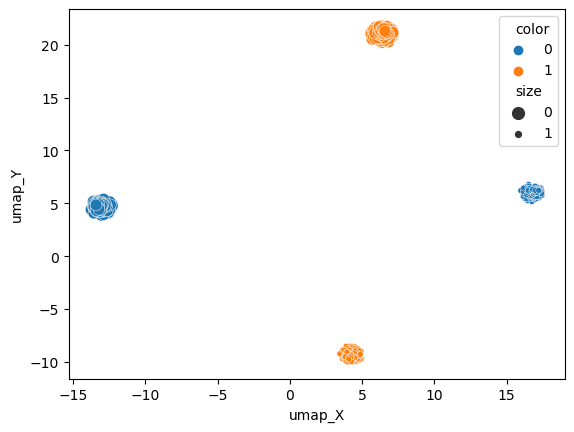

In [103]:
sns.scatterplot(
    data=data_2d,
    x='umap_X',
    y='umap_Y', 
    hue='color',
    size='size')

# Three features

In [104]:
data_3d = data

In [105]:
data_3d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   color   500 non-null    object
 1   size    500 non-null    object
 2   weight  500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


## One-hot encoding

In [106]:
data_3d = pd.concat([data_3d, pd.get_dummies(data_3d)], axis=1)

In [107]:
data_3d.head()

,color,size,weight,color_black,color_white,size_big,size_small,weight_heavy,weight_light
0,black,small,heavy,1,0,0,1,1,0
1,white,big,light,0,1,1,0,0,1
2,black,small,light,1,0,0,1,0,1
3,black,big,light,1,0,1,0,0,1
4,white,small,heavy,0,1,0,1,1,0


In [108]:
embedding = reducer.fit_transform(data_3d.iloc[:, 3:])
embedding.shape

(500, 2)

In [109]:
data_3d['umap_X'] = embedding[:, 0]
data_3d['umap_Y'] = embedding[:, 1]

<AxesSubplot:xlabel='umap_X', ylabel='umap_Y'>

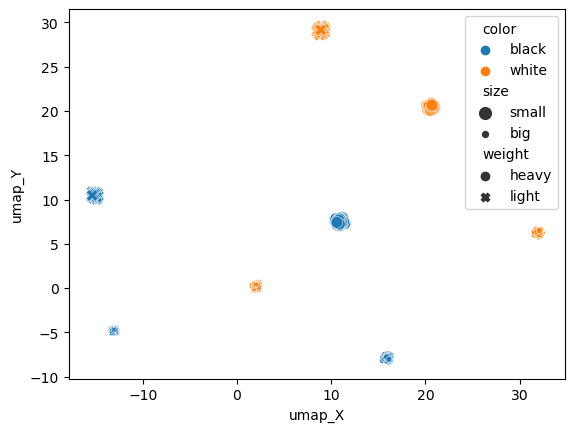

In [110]:
sns.scatterplot(
    data=data_3d,
    x='umap_X',
    y='umap_Y', 
    hue='color',
    size='size',
    style='weight')

## Label encoding

In [111]:
data_3d['color'] = labelencoder.fit_transform(data_3d['color'])
data_3d['size'] = labelencoder.fit_transform(data_3d['size'])
data_3d['weight'] = labelencoder.fit_transform(data_3d['weight'])

In [112]:
data_3d.head()

,color,size,weight,color_black,color_white,size_big,size_small,weight_heavy,weight_light,umap_X,umap_Y
0,0,1,0,1,0,0,1,1,0,11.435803,7.301851
1,1,0,1,0,1,1,0,0,1,1.635061,0.205700
2,0,1,1,1,0,0,1,0,1,-14.733028,10.398211
3,0,0,1,1,0,1,0,0,1,-12.941609,-4.897605
4,1,1,0,0,1,0,1,1,0,20.464855,20.404085


In [113]:
embedding = reducer.fit_transform(data_3d.iloc[:,0:3])
embedding.shape

(500, 2)

In [114]:
data_3d['umap_X'] = embedding[:, 0]
data_3d['umap_Y'] = embedding[:, 1]

<AxesSubplot:xlabel='umap_X', ylabel='umap_Y'>

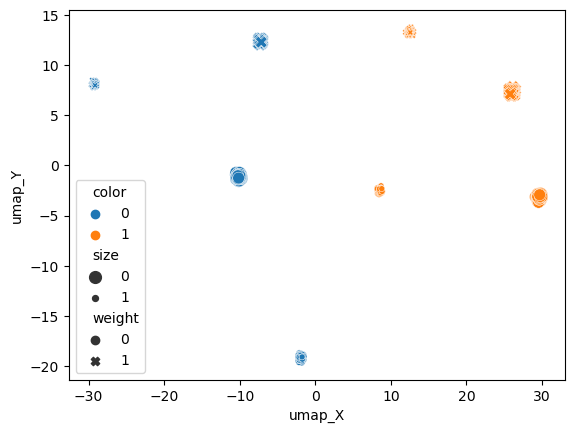

In [115]:
sns.scatterplot(
    data=data_3d,
    x='umap_X',
    y='umap_Y', 
    hue='color',
    size='size',
    style='weight')